<a href="https://colab.research.google.com/github/naskinovai/TL/blob/main/transfer_learning_005.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The objective of the research is to detect Cancer metastasis on histopathology images of lymph nodes using the PatchCamelyon dataset [1] hosted on Kaggle.
Having the correct diagnosis of the advancement of the disease is crucial to choose the most suitable treatment course, this is why doctors rely on histopathology images of biopsied tissue where there might be metastasis. In this project we will train a model to automatically detect evidence of malignancy in order to help doctors make better decisions and hopefully provide better care for Cancer patients.
The steps presented here can also serve a strong baseline to any generic image classification problem

Agenda:
- how to train an image classifier was tf.keras
- how to load and preprocess data
- what are the various options of model building with tf.keras
- how the model training is evaluated

What is image classification?
Image classification is the task where we train a model to classify it within an image belongs to one or multiple classes.

How to Train an Image Classifier

Step 1. Data Processing
Step 2. Model Building
Step 3. Train and evaluate

Transfer Learning Process
Transfer learning with a pre-trained Resnet50 ImageNet model.
The following data augmentations: Image resizing, random cropping, and
horizontal and vertical axis image flipping.
Fit one cycle method to optimise learning rate selection for our training.
Discriminative learning rates to fine-tune.

optimisations and regularisation techniques in our training:
Dropout
Weight decay
Batch normalisation
Average and Max-pooling
Adam Optimisers
ReLU Activations

Data
The dataset is a set of 96x96 images where each image is labeled 1 if there is evidence of malignancy in the 32x32 center section of the image or 0 otherwise.


https://miro.medium.com/max/2000/1*994tgmGJLssN4R4076QEog.png

Data Source
PatchCam (Kaggle)
PCam was prepared by Bas Veeling, a Phd student in machine learning for health from the Netherlands, specifically to help machine learning practitioners interested in working on this particular problem. It consists of 327,680, 96x96 colour images. An excellent overview of the dataset can be found here: http://basveeling.nl/posts/pcam/, and also available via download on github where there is further information on the data: https://github.com/basveeling/pcam

Each image is annoted with a binary label indicating presence of metastatic tissue.
Each image is of size [96, 96,3] (colored images) with a binary label of either 0 or 1.The data-set is having a train, validation and test split.

From the author’s words:
PCam packs the clinically-relevant task of metastasis detection into a straight-forward binary image classification task, akin to CIFAR-10 and MNIST. Models can easily be trained on a single GPU in a couple hours, and achieve competitive scores in the Camelyon16 tasks of tumor detection and whole-slide image diagnosis. Furthermore, the balance between task-difficulty and tractability makes it a prime suspect for fundamental machine learning research on topics as active learning, model uncertainty, and explainability.

Why PCam
Fundamental machine learning advancements are predominantly evaluated on straight-forward natural-image classification datasets. Think MNIST, CIFAR, SVHN. Medical imaging is becoming one of the major applications of ML and we believe it deserves a spot on the list of go-to ML datasets. Both to challenge future work, and to steer developments into directions that are beneficial for this domain.

We think PCam can play a role in this. It packs the clinically-relevant task of metastasis detection into a straight-forward binary image classification task, akin to CIFAR-10 and MNIST. Models can easily be trained on a single GPU in a couple hours, and achieve competitive scores in the Camelyon16 tasks of tumor detection and WSI diagnosis. Furthermore, the balance between task-difficulty and tractability makes it a prime suspect for fundamental machine learning research on topics as active learning, model uncertainty and explainability.

Loading the Data-set
To load the data-set the first thing we will need to do is import the necessary libraries. We will then use the tfds.load() to load (downloads and then load on the first time)our data-set while setting with _info and as_supervised to True.

The data is stored in gzipped HDF5 files and can be downloaded using the following links. Each set consist of a data and target file. An additional meta csv file is provided which describes from which Camelyon16 slide the patches were extracted from, but this information is not used in training for or evaluating the benchmark. Please report any downloading problems via a github issue.

Numbers
The dataset is divided into a training set of 262.144 (2^18) examples, and a validation and test set both of 32.768 (2^15) examples. There is no overlap in WSIs between the splits, and all splits have a 50/50 balance between positive and negative examples.

Labeling
A positive label indicates that the center 32x32px region of a patch contains at least one pixel of tumor tissue. Tumor tissue in the outer region of the patch does not influence the label. This outer region is provided to enable the design of fully-convolutional models that do not use any zero-padding, to ensure consistent behavior when applied to a whole-slide image. This is however not a requirement for the PCam benchmark.

Patch selection
PCam is derived from the Camelyon16 Challenge [2], which contains 400 H&E stained WSIs of sentinel lymph node sections. The slides were acquired and digitized at 2 different centers using a 40x objective (resultant pixel resolution of 0.243 microns). We undersample this at 10x to increase the field of view. We follow the train/test split from the Camelyon16 challenge [2], and further hold-out 20% of the train WSIs for the validation set. To prevent selecting background patches, slides are converted to HSV, blurred, and patches filtered out if maximum pixel saturation lies below 0.07 (which was validated to not throw out tumor data in the training set). The patch-based dataset is sampled by iteratively choosing a WSI and selecting a positive or negative patch with probability p. Patches are rejected following a stochastic hard-negative mining scheme with a small CNN, and p is adjusted to retain a balance close to 50/50.

https://github.com/basveeling/pcam

[1] B. S. Veeling, J. Linmans, J. Winkens, T. Cohen, M. Welling. "Rotation Equivariant CNNs for Digital Pathology". arXiv:1806.03962

A citation of the original Camelyon16 dataset paper is appreciated as well:

[2] Ehteshami Bejnordi et al. Diagnostic Assessment of Deep Learning Algorithms for Detection of Lymph Node Metastases in Women With Breast Cancer. JAMA: The Journal of the American Medical Association, 318(22), 2199–2210. doi:jama.2017.14585

@ARTICLE{Veeling2018-qh,
  title         = "Rotation Equivariant {CNNs} for Digital Pathology",
  author        = "Veeling, Bastiaan S and Linmans, Jasper and Winkens, Jim and
                   Cohen, Taco and Welling, Max",
  month         =  jun,
  year          =  2018,
  archivePrefix = "arXiv",
  primaryClass  = "cs.CV",
  eprint        = "1806.03962"
}

the tfds.load() on line 9, setting with_info = True returns information about our data-set which is then stored in the variable we declared

Augmentation
In order to reduce overfitting and increase the generalization capabilities of the model we use data augmentation, which is a sequence of random perturbations applied to the image that preserve the label information. Training with those perturbation also makes the model more robust to noise and increase its invariance to translation and rotation.

https://miro.medium.com/max/2000/1*pYIVaZQPxLvK0RRg0psJSQ.png


https://github.com/Sanatramesh/PCamNet/blob/master/PCamNet%20Visualizer.ipynb

as_supervised = True loads our data-set as a(image, label) tuple structure.

https://towardsdatascience.com/metastasis-detection-using-cnns-transfer-learning-and-data-augmentation-684761347b59


Our data-set consists of train, validation and test splits. line 12,13, 14 assigns each individual split in their respective variables

In [1]:
#Importing the necessary libraries

from tensorflow import keras
import tensorflow as tf
import os,datetime
import tensorflow_datasets as tfds

#Loading the data from tensorflow_datasets
df, info = tfds.load('patch_camelyon', with_info = True, as_supervised = True)

#Getting the train, validation and test data
train_data = df['train']
valid_data = df['validation']
test_data = df['test']

PREPROCESS THE DATA
Before feeding our data into the CNN it will have to go through some form of preprocessing.
Each pixels of the image in our data-set ranges from 0 to 255 which we will scale to between 0 and 1.
After then we batch and prefetch train, validation and test data. 
Prefetch will grab the next dataset item "in advance" while the current one is being processed to reduce latency. Since dataset operations are usually done on the CPU, the idea is that you can take advantage of the unused CPU power (and I/O bandwidth) while the GPU is processing a batch. Most dataset input pipelines should end with a call to prefetch. This allows later elements to be prepared while the current element is being processed. This often improves latency and throughput, at the cost of using additional memory to store prefetched elements.
It can be used to decouple the time when data is produced from the time when data is consumed. In particular, the transformation uses a background thread and an internal buffer to prefetch elements from the input dataset ahead of the time they are requested.  

Transfer learning + Fine-tuning = Better Generalisation
Transfer learning alone brings us much further than training our network from scratch. But this method is prone to optimisation difficulties present between fragile co-adpated layers when connecting a per-trained network. We counter this by fine-tuning our model; making the all layers of our network, including the pre-trained Resnet50 layers, to be trainable. When we unfreeze we train across all of our layers. (See [6])

This leads to better results and a better ability to generalise to new examples.

Model
We use NasNet mobile pretrained on ImageNet (see Transfer Learning ) because its fast and thus can be fully trained on Kaggle kernels within the 6 hours time limit.
https://www.kaggle.com/CVxTz/cnn-starter-nasnet-mobile-0-9709-lb


Training
We use a small portion of the training set as validation, and then use model Checkpoint Keras Callback to save the best weights and load them before we do the prediction on the Leaderboard data.

Prediction and Post processing
For each image of the test set we average the predictions of the original image and that of the horizontally/vertically flipped versions.

In [2]:
#Transfer Learning with a Pretrained ConvNet

In [3]:
%tensorflow_version 2.x

In [4]:
import tensorflow as tf

In [5]:
tf.version.VERSION

'2.6.0'

In [6]:
import numpy as np
import matplotlib.pyplot as plt

#Import Tensorflow datasets
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

#Import Keras
from tensorflow import keras
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from keras.applications.imagenet_utils import decode_predictions

#Data pipeline

In [7]:
# #Load train and validation datasets
# (raw_train, raw_validation, raw_test), metadata = tfds.load(
#     name='patch_camelyon',
#     with_info=True,
#     as_supervised=True
# )

In [17]:
# print('Total number of samples:', metadata.splits['train'].num_examples)

Total number of samples: 262144


In [18]:
# print('Total number of test samples:', metadata.splits['test'].num_examples)

Total number of test samples: 32768


In [19]:
# print('Total number of validation samples:', metadata.splits['validation'].num_examples)

Total number of validation samples: 32768


In [20]:
# num_classes = metadata.features['label'].num_classes
# num_train = len(list(raw_train))
# num_validation = len(list(raw_validation))
# num_test = len(list(raw_test))

In [21]:
# print(f'Number of classes: {num_classes}')
# print(f'Number of training samples: {num_train}')
# print(f'Number of validation samples: {num_validation}')
# print(f'Number of test samples: {num_test}')

Number of classes: 2
Number of training samples: 4
Number of validation samples: 5
Number of test samples: 10


In [22]:
# print(raw_train)
# print(raw_validation)
# print(raw_test)

test
train
validation


In [23]:
# class_names = np.array(metadata.features['label'].names)
# print(class_names)

['0' '1']


In [8]:
#Importing the necessary libraries

from tensorflow import keras
import tensorflow as tf
import os,datetime
import tensorflow_datasets as tfds

#Loading the data from tensorflow_datasets
df, info = tfds.load('patch_camelyon', with_info = True, as_supervised = True)

#Getting the train, validation and test data
train_data = df['train']
valid_data = df['validation']
test_data = df['test']

In [9]:
#A function to help scale the images
def preprocess(image, labels):
  image = tf.cast(image, tf.float32)
  image /= 255.
  return image, labels

#Applying the preprocess function we the use of map() method
train_data = train_data.map(preprocess)
valid_data = valid_data.map(preprocess)
test_data = test_data.map(preprocess)

#Shuffling the train_data
buffer_size = 1000
train_data = train_data.shuffle(buffer_size)

#Batching and prefetching
batch_size = 128
train_data = train_data.batch(batch_size).prefetch(1)
valid_data = valid_data.batch(batch_size).prefetch(1)
test_data = test_data.batch(batch_size).prefetch(1)

In [10]:
#Seperating image and label into different variables
train_images, train_labels = next(iter(train_data))
valid_images, valid_labels = next(iter(valid_data))
test_images, test_labels  = next(iter(test_data))

#Checking the label shape
valid_labels.shape
print(valid_labels.shape)
#Checking the image shape
train_images.shape
print(train_images.shape)

(128,)
(128, 96, 96, 3)


In [11]:
IMG_SHAPE=[96, 96, 3]

iter() goes through the data to separate image and label remember we set as_supervise = True
next() moves on to the next batch
We then check the shape of our label which gives (128,1), note that the first item is our batch_size not the total numbers of labels in our data-set
train_images.shape returns TensorShape([128, 96, 96, 3]) The first item also is our batch_size while the shape of the images in our data-set is [96,96,3] i.e our input_shape

In [12]:
#import the necessary libraries
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers

model = Sequential([
                    Conv2D(256, 3,padding='same', kernel_initializer='he_uniform', activation='relu', input_shape = IMG_SHAPE),
                    MaxPooling2D(2),
                    Conv2D(256, 3,padding='same', kernel_initializer='he_uniform',activation='relu',),
                    MaxPooling2D(2),
                    Conv2D(512, 3,padding='same',kernel_initializer='he_uniform',activation='relu',),
                    MaxPooling2D(2),
                    Conv2D(512, 3,padding='same',kernel_initializer='he_uniform',activation='relu',),
                    MaxPooling2D(2),
                    Conv2D(1024, 3,padding='same', kernel_initializer='he_uniform',activation='relu',),
                    MaxPooling2D(2),
                    Conv2D(1024, 3,padding='same', kernel_initializer='he_uniform',activation='relu',),
                    MaxPooling2D(2),
                    Flatten(),
                    Dense(1028,kernel_initializer='he_uniform',activation = 'relu'),
                    Dense(512,kernel_initializer='he_uniform',activation = 'relu'),
                    Dense(128, kernel_initializer='he_uniform',activation = 'relu'),
                    Dense(1, activation = 'sigmoid'),
                    ])
 

Our first layer consist of 256 number of filters each of size 3 (i.e 3 x 3) and our input_shape variable also goes to the first layer
The next layer consist of maxpooling with a pool size of 2
The same was repeated, with an increase in the number of filters 256,512, 1024
for the layers having (padding = same)each image will be padded
Kernel_initializer is use to randomness weight at the start of the training
activation function used was ‘relu’
flatten layer flattens the shape of our images before passing on to the Dense layer
We have three Dense hidden layer with hidden units of 1024, 512, 128
We expects our model to return a single output i.e 0 or 1 so our output layer contains just 1 hidden unit with a ‘sigmoid’ activation function

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 256)       7168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 256)       590080    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 512)       1180160   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 512)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 512)       2

Adam optimizer was used with a learning rate of 0.0001
since our labels are already encoded to 0’s and 1’s we are going to use ‘binary_crossentropy’ has our loss function
Early stopping callback was also implemented to monitor our val_loss and to stop the model if there is no increase in val_loss for 10 epochs
model.fit() will start the training of our model

In [14]:
#Compiling our model
model.compile(optimizer= optimizers.Adam(1e-4), loss='binary_crossentropy', metrics=['acc'])

#Callbacks
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

#Fitting our model
history = model.fit( train_images, train_labels, epochs = 100, callbacks=[early_stopping_cb], validation_data = (valid_images, valid_labels), verbose=2)


Epoch 1/100
4/4 - 65s - loss: 2.8425 - acc: 0.4453 - val_loss: 0.7020 - val_acc: 0.5859
Epoch 2/100
4/4 - 66s - loss: 0.7777 - acc: 0.4922 - val_loss: 0.6960 - val_acc: 0.4141
Epoch 3/100
4/4 - 62s - loss: 0.7398 - acc: 0.3672 - val_loss: 0.8729 - val_acc: 0.4141
Epoch 4/100
4/4 - 63s - loss: 0.7511 - acc: 0.5234 - val_loss: 0.6798 - val_acc: 0.5859
Epoch 5/100
4/4 - 62s - loss: 0.7511 - acc: 0.5469 - val_loss: 0.8900 - val_acc: 0.4141
Epoch 6/100
4/4 - 63s - loss: 0.7099 - acc: 0.5703 - val_loss: 0.6620 - val_acc: 0.5859
Epoch 7/100
4/4 - 63s - loss: 0.7074 - acc: 0.4609 - val_loss: 0.6869 - val_acc: 0.4844
Epoch 8/100
4/4 - 62s - loss: 0.7058 - acc: 0.5547 - val_loss: 0.7228 - val_acc: 0.4141
Epoch 9/100
4/4 - 63s - loss: 0.6211 - acc: 0.7656 - val_loss: 0.6114 - val_acc: 0.6719
Epoch 10/100
4/4 - 62s - loss: 0.6214 - acc: 0.6562 - val_loss: 0.6726 - val_acc: 0.5781
Epoch 11/100
4/4 - 62s - loss: 0.5854 - acc: 0.7031 - val_loss: 0.5675 - val_acc: 0.7344
Epoch 12/100
4/4 - 62s - loss:

In [15]:
NUM_EPOCHS=100

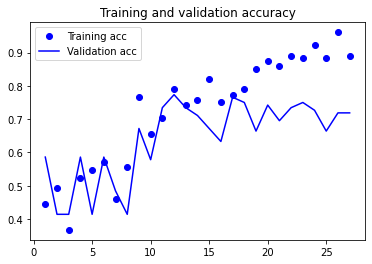

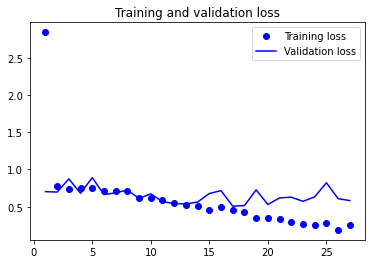

In [16]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [15]:
model.evaluate(test_images, test_labels)

4/4 [==============================] - 12s 3s/step - loss: 0.7452 - acc: 0.6016


[0.7451815009117126, 0.6015625]

#Visualize the data

In [ ]:
#Set the training parameters
NUM_EPOCHS = 10
steps_per_epoch = round(num_train)//BATCH_SIZE
validation_steps = round(num_validation)//BATCH_SIZE

In [ ]:
#Baseline -- train from scratch
#Train a very simple CNN model and use the accuracy matrics as baseline to compare with tranfer learning results.

#Baseline -- train from scratch
##Train a very simple CNN model and use the accuracy matrics as baseline to compare with tranfer learning results.

In [17]:
# Display training curves
def display_training_curves(history, num_epochs,title):
  acc=history.history['acc']
  val_acc = history.history['val_acc']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epoch_range = range(num_epochs)

  plt.plot(epoch_range, acc, label='Train accuracy')
  plt.plot(epoch_range, val_acc, label='Val accuracy')
  plt.title(title)
  plt.legend(loc='upper left')
  plt.figure()

  plt.show()

Create model

Compile and train the model


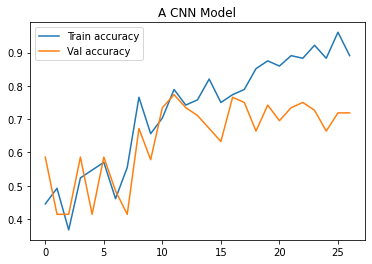

<Figure size 432x288 with 0 Axes>

In [21]:
# Display training curve
display_training_curves(history,27, "A CNN Model")

#Transfer learning


In [23]:
from keras.applications.nasnet import preprocess_input
from keras.callbacks import ModelCheckpoint
from keras.applications.nasnet import NASNetMobile
from keras.layers import Dense, Input, Dropout, Concatenate, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.layers import Flatten
from keras.losses import binary_crossentropy
from keras.models import Model

In [26]:
def get_model_classif_nasnet():
    inputs = Input((224, 224, 3))
    base_model = NASNetMobile(include_top=False, input_shape=(224, 224, 3))#, weights=None
    x = base_model(inputs)
    out1 = GlobalMaxPooling2D()(x)
    out2 = GlobalAveragePooling2D()(x)
    out3 = Flatten()(x)
    out = Concatenate(axis=-1)([out1, out2, out3])
    out = Dropout(0.5)(out)
    out = Dense(1, activation="sigmoid", name="3_")(out)
    model = Model(inputs, out)
    model.compile(optimizer=Adam(0.0001), loss=binary_crossentropy, metrics=['acc'])
    model.summary()

    return model

model = get_model_classif_nasnet()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
NASNet (Functional)             (None, 7, 7, 1056)   4269716     input_4[0][0]                    
__________________________________________________________________________________________________
global_max_pooling2d_1 (GlobalM (None, 1056)         0           NASNet[0][0]                     
__________________________________________________________________________________________________
global_average_pooling2d_1 (Glo (None, 1056)         0           NASNet[0][0]                     
____________________________________________________________________________________________

Feature extractor
Use MobileNetV2 as a feature extractor and add a classifier on top of it.

In [27]:
#Create base model from tf.keras pre-trained model MobileNetV2
base_model = MobileNetV2(
    input_shape=IMG_SHAPE,
    weights='imagenet',
    include_top=False
    )


Freeze all layers of the base model


In [28]:
base_model.trainable = False

Add a classifier head
Create a new model by adding a classifier on top of the base model.


In [29]:
def build_mobilenetv2_model(base_model):
  model = Sequential([
    base_model,
    Conv2D(256, 3,padding='same', kernel_initializer='he_uniform', activation='relu'),
    GlobalAveragePooling2D(),
    Dense(1, activation = 'softmax')
  ])
  return model

In [30]:
model=build_mobilenetv2_model(base_model)

In [ ]:
#Compiling our model
model.compile(optimizer= optimizers.Adam(1e-4), loss='binary_crossentropy', metrics=['acc'])

#Callbacks
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='acc', patience=40)

#Fitting our model

history = model.fit( train_images, train_labels, epochs = 100, callbacks=[early_stopping_cb], validation_data = (valid_images, valid_labels), verbose=2)


Epoch 1/100
4/4 - 6s - loss: 0.8943 - acc: 0.5391 - val_loss: 0.5731 - val_acc: 0.4141
Epoch 2/100
4/4 - 2s - loss: 0.5068 - acc: 0.5391 - val_loss: 0.4868 - val_acc: 0.4141
Epoch 3/100
4/4 - 2s - loss: 0.3257 - acc: 0.5391 - val_loss: 0.6455 - val_acc: 0.4141
Epoch 4/100
4/4 - 2s - loss: 0.2567 - acc: 0.5391 - val_loss: 0.5643 - val_acc: 0.4141
Epoch 5/100
4/4 - 2s - loss: 0.1937 - acc: 0.5391 - val_loss: 0.5636 - val_acc: 0.4141
Epoch 6/100
4/4 - 2s - loss: 0.1561 - acc: 0.5391 - val_loss: 0.5930 - val_acc: 0.4141
Epoch 7/100
4/4 - 2s - loss: 0.1143 - acc: 0.5391 - val_loss: 0.6448 - val_acc: 0.4141
Epoch 8/100
4/4 - 2s - loss: 0.1099 - acc: 0.5391 - val_loss: 0.6617 - val_acc: 0.4141
Epoch 9/100
4/4 - 2s - loss: 0.0873 - acc: 0.5391 - val_loss: 0.6071 - val_acc: 0.4141
Epoch 10/100
4/4 - 2s - loss: 0.0810 - acc: 0.5391 - val_loss: 0.6191 - val_acc: 0.4141
Epoch 11/100
4/4 - 2s - loss: 0.0622 - acc: 0.5391 - val_loss: 0.6795 - val_acc: 0.4141
Epoch 12/100
4/4 - 2s - loss: 0.0592 - ac

Compile the model

In [ ]:
model.summary()

Train the model

In [ ]:
#Display training curve
display_training_curves(history,42,'Pretrained ConvNet as Feature Extractor')

Fine Tuning

In [ ]:
# Unfreeze all layers in base model
base_model.trainable = True

In [ ]:
#Check how many layers are int he base model
print("Number of layers in th base model: ", len(base_model.layers))

In [ ]:
#Fine-tune from this layer onwards. 
# 100 layers are frozen and 54 layers are trainable
fine_tune_at = 100

#Freeze all the layers before the 'fine_tune_at' layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

In [ ]:
#Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer = Adam(1e-5),#use a smaller learning rate when fine-tuning
              metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
INITIAL_EPOCHS=10
FINE_TUNE_EPOCHS=10
TOTAL_EPOCHS=INITIAL_EPOCHS + FINE_TUNE_EPOCHS #20

Th training starts at epoch 11, as the inital epoch was set to 10

In [ ]:
%%time
history_fine = model.fit(train_batches, 
                         epochs=TOTAL_EPOCHS,#20
                         initial_epoch = INITAIAL_EPOCHS,#10
                         validation_data=validation_batches,
                         steps_per_epoch=steps_per_epoch,
                         validation_steps=validation_steps
                         )

In [ ]:
#Display training curve
acc = history.history['accuracy'] + history_fine.history['accuracy']
val_acc = history.history['val_accuracy'] + history_fine.history['val_accuracy']

plt.figure(figsize=(8,4))

plt.plot(acc,label='Train accuracy')
plt.plot(val_acc, label='Val accuracy')

plt.ylim(0.8,1)
plt.plot([NUM_EPOCHS -1, NUM_EPOCHS -1],plt.ylim(ymin=0.55),label='Start Fine Tuning')
plt.title('Fine-tune a Pretrained ConvNet')
plt.legend(loc='upper left')

plt.show()

Test Accuracy

In [ ]:
#Evaluate the model on the test dataset
score = model.evaluate(test_batches, verbose=0)

#Print the accuracy
print('\n', 'Test accuracy:', score[1])

Visualize predictions

In [ ]:
image_batch, label_batch = next(iter(test_batches))

image_batch = image_batch.numpy()
label_batch = label_batch.numpy()

predicted_batch = model.predict(image_batch)
predicted_batch = tf.squeeze(predicted_batch).numpy()

predicted_class_ids = np.argmax(predicted_batch, axis = -1)
predicted_class_names = class_names[predicted_class_ids]

we visualize some of the images and compare whether the predicted labels equal to the true labels

In [ ]:
plt.figure(figsize=(8, 8))

#Display 16 test images with predictions
for i in range(16):
  plt.subplot(4,4,i+1)
  #Display each image
  plt.imshow(image_batch[i])
  #Set title color: green if the prediction is correct and red if the prediction is not correct
  title_color = 'green' if predicted_class_ids[i] == label_batch[i] else 'red'
  plt.title(predicted_class_names[i].title(), color=title_color)
  plt.axis('off')

  _ = plt.suptitle('Model Predictions')